In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
#from pyemma import msm

%matplotlib inline
#Script Pyeemma curl -s https://raw.githubusercontent.com/markovmodel/PyEMMA/devel/install_miniconda%2Bpyemma.sh | bash


#https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb


In [2]:
expedia = pd.read_csv('./DataMiningUSA/DataEntrenamiento1.csv')

In [3]:
expedia.head(50)

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44
5,2019-01-01 06:00:00,29,14,18,10,34,7,10,22,45,6,9,0,30
6,2019-01-01 07:00:00,27,9,28,8,16,9,7,17,48,4,5,19,21
7,2019-01-01 08:00:00,34,11,18,13,12,8,10,12,42,7,12,22,2
8,2019-01-01 09:00:00,35,6,10,12,24,2,14,5,27,10,7,25,1
9,2019-01-01 10:00:00,26,1,6,7,3,2,0,3,1,11,6,14,0


In [4]:
expedia.columns.values

array(['DateTime', 'Carvajal - Sevillana', 'Centro de Alto Rendimiento',
       'Fontibon', 'Guaymaral', 'Kennedy', 'Las Ferias', 'Puente Aranda',
       'San Cristobal', 'Suba', 'Usaquen', 'MinAmbiente', 'Movil 7ma',
       'Tunal'], dtype=object)

In [5]:
expedia.shape

(58765, 14)

In [6]:
df = expedia

In [7]:
df.describe()

,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
count,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000,58765.000000
mean,24.512856,14.035957,2.675300,9.691772,25.856343,12.037778,6.807862,7.225917,14.177146,11.076015,11.550838,14.638050,17.360861
std,17.949472,13.814243,7.787814,11.645361,16.927082,13.398335,11.169790,9.056972,13.573726,11.829382,13.735417,18.528539,16.723235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,12.000000,3.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,5.000000
50%,25.000000,10.000000,0.000000,6.000000,23.000000,8.000000,0.000000,4.000000,12.000000,8.000000,7.000000,8.000000,13.000000
75%,35.000000,21.000000,0.000000,15.000000,34.000000,19.000000,12.000000,11.000000,22.000000,16.000000,17.000000,25.000000,25.000000
max,171.000000,180.000000,136.000000,238.000000,416.000000,143.000000,98.000000,104.000000,235.000000,135.000000,311.000000,210.000000,232.000000


In [8]:
a = df["Centro de Alto Rendimiento"][0]
type(a)

numpy.int64

In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format= '%Y-%m-%d %H:%M:%S')

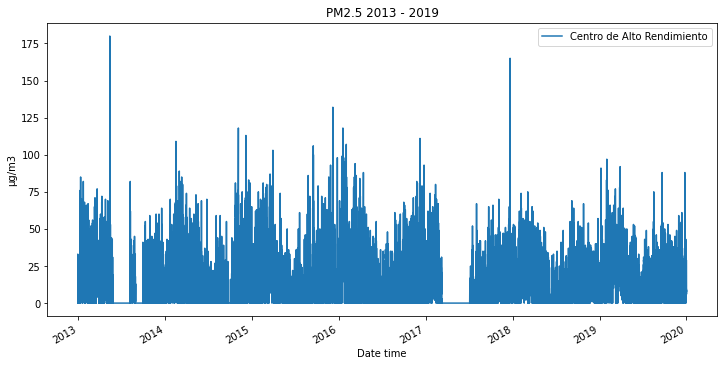

In [10]:
# plot the data
df.plot(x='DateTime', y='Centro de Alto Rendimiento', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2013 - 2019');



In [11]:
df.head()

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44


In [12]:
pd.isnull(df).values.ravel().sum()

0

In [13]:
data2 = df

In [14]:
data2.head()

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44


In [15]:
data2.shape

(58765, 14)

In [16]:
#Rellena los NaN con el valor 0
data2 = data2.fillna(method="ffill")

In [17]:
pd.isnull(data2).values.ravel().sum()

0

In [18]:
data2.head(10)

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44
5,2019-01-01 06:00:00,29,14,18,10,34,7,10,22,45,6,9,0,30
6,2019-01-01 07:00:00,27,9,28,8,16,9,7,17,48,4,5,19,21
7,2019-01-01 08:00:00,34,11,18,13,12,8,10,12,42,7,12,22,2
8,2019-01-01 09:00:00,35,6,10,12,24,2,14,5,27,10,7,25,1
9,2019-01-01 10:00:00,26,1,6,7,3,2,0,3,1,11,6,14,0


In [19]:

data = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda']]

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

KeyError: "None of [Index(['Centro_de_Alto_Rendimiento', 'Puente_Aranda'], dtype='object')] are in the [columns]"

In [ ]:
X = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda', 'Puente_Aranda']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=6)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("Centro_de_Alto_Rendimiento")
ax.set_ylabel("Puente_Aranda")
ax.set_zlabel("Puente_Aranda")
plt.title("K Means", fontsize=14);

In [ ]:
data = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda', 'Puente_Aranda']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [ ]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
#https://machinelearningmastery.com/start-here/#deep_learning_time_series

In [ ]:
#https://www.mdpi.com/1424-8220/19/11/2451/htm#B9-sensors-19-02451
#https://www.mdpi.com/sensors/sensors-19-02451/article_deploy/html/images/sensors-19-02451-g006.png

In [ ]:
#https://iopscience.iop.org/article/10.1088/1742-6596/803/1/012143/pdf
#https://arxiv.org/pdf/1812.00890.pdfgit